In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

data = pd.read_csv('clusters.csv')
X = data.values

Configuración de hiperparámetros

In [ ]:
k_values = [2, 3, 4, 5]  # Número de clusters para K-Means y GaussianMixture
linkage_methods = ['ward', 'average']  # Métodos de enlace para Hierarchical Clustering
eps_values = [0.1, 0.3]  # Radio para DBSCAN
min_samples_values = [5]  # Min Samples para DBSCAN
covariance_types = ['full', 'tied']  # Tipos de covarianza para GaussianMixture

Función para evaluar clustering

In [ ]:
def evaluate_clustering(labels, X):
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    return silhouette_avg, davies_bouldin, calinski_harabasz

Aplicación de los algoritmos y evaluación

In [ ]:
results = []

K-Means

In [ ]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    scores = evaluate_clustering(labels, X)
    results.append(("K-Means", k, "NA", "NA", "NA", scores))

Hierarchical Clustering

In [7]:
for linkage in linkage_methods:
    for k in k_values:
        ac = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = ac.fit_predict(X)
        scores = evaluate_clustering(labels, X)
        results.append(("Hierarchical", k, linkage, "NA", "NA", scores))


DBSCAN

In [8]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(np.unique(labels)) > 1:  # Validar si hay más de un cluster (excluyendo ruido)
            scores = evaluate_clustering(labels, X)
            results.append(("DBSCAN", "NA", "NA", eps, min_samples, scores))

Gaussian Mixture

In [9]:
for k in k_values:
    for covariance_type in covariance_types:
        gm = GaussianMixture(n_components=k, covariance_type=covariance_type, random_state=42)
        labels = gm.fit_predict(X)
        scores = evaluate_clustering(labels, X)
        results.append(("GaussianMixture", k, "NA", "NA", covariance_type, scores))

Organizar y mostrar resultados

In [10]:
results_df = pd.DataFrame(results, columns=["Algorithm", "Clusters", "Linkage", "Eps", "MinSamples/CovType", "Scores"])
print(results_df)

          Algorithm Clusters  Linkage  Eps MinSamples/CovType  \
0           K-Means        2       NA   NA                 NA   
1           K-Means        3       NA   NA                 NA   
2           K-Means        4       NA   NA                 NA   
3           K-Means        5       NA   NA                 NA   
4      Hierarchical        2     ward   NA                 NA   
5      Hierarchical        3     ward   NA                 NA   
6      Hierarchical        4     ward   NA                 NA   
7      Hierarchical        5     ward   NA                 NA   
8      Hierarchical        2  average   NA                 NA   
9      Hierarchical        3  average   NA                 NA   
10     Hierarchical        4  average   NA                 NA   
11     Hierarchical        5  average   NA                 NA   
12           DBSCAN       NA       NA  0.1                  5   
13           DBSCAN       NA       NA  0.3                  5   
14  GaussianMixture      

Gráficos de métricas para evaluación de clustering

In [12]:
# Extraer métricas para cada valor de K
k_silhouette_scores = []
k_dbi_scores = []
k_chi_scores = []

for k in k_values:
    # Filtrar resultados para cada valor de K en K-Means
    filtered_results = results_df[(results_df['Algorithm'] == 'K-Means') & (results_df['Clusters'] == k)]
    if not filtered_results.empty:
        best_score = filtered_results.iloc[0]['Scores']
        k_silhouette_scores.append(best_score[0])
        k_dbi_scores.append(best_score[1])
        k_chi_scores.append(best_score[2])

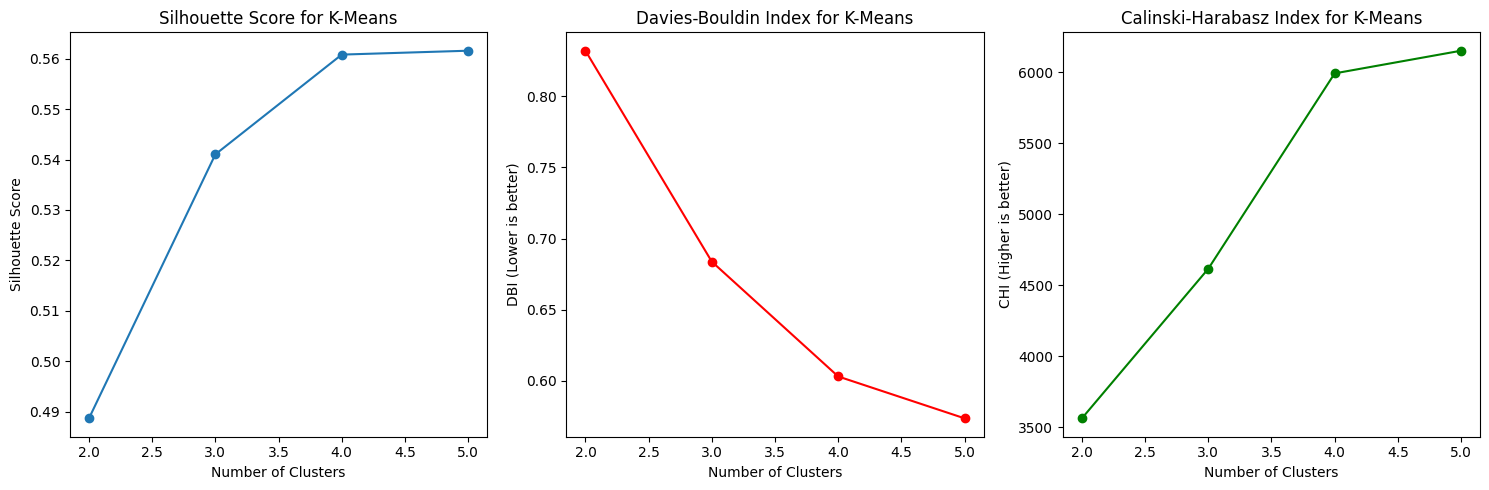

In [13]:
# Gráficos
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, k_silhouette_scores, marker='o')
plt.title('Silhouette Score for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, k_dbi_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('DBI (Lower is better)')

plt.subplot(1, 3, 3)
plt.plot(k_values, k_chi_scores, marker='o', color='green')
plt.title('Calinski-Harabasz Index for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('CHI (Higher is better)')

plt.tight_layout()
plt.show()

4 clusters parece ser el número óptimo basado en estas métricas porque:
- El Silhouette Score es alto y se estabiliza en este punto, sugiriendo que los clusters tienen buena cohesión y separación.
- El DBI es más bajo para 4 clusters, indicando una buena separación y compactación de los clusters.
- El CHI muestra una mejora significativa hasta 4 clusters, lo que indica una eficacia en la diferenciación de los clusters hasta este punto.

Basado en las métricas visuales y la simplicidad del modelo junto con la interpretabilidad, K-Means parece ser el algoritmo más adecuado para este conjunto de datos particular, dada su eficacia en la formación de clusters bien definidos y separados con 4 clusters. Además, ofrece un buen equilibrio entre rendimiento y coste computacional.